In [110]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\users\take1106\appdata\local\programs\python\python310\lib\site-packages (1.11.4)




[notice] A new release of pip available: 22.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
#ライブラリ・モジュールのインポート
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [109]:
import scipy as sc

In [112]:
train_data = pd.read_csv("train.csv")

In [113]:
test_data = pd.read_csv("test.csv")

In [114]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [115]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [116]:
#欠損値の処理
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

test_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
test_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].median())

In [117]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [118]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [119]:
#説明関数に不要なカラムの削除
drop_columns = ["Name","Ticket","Cabin"]
train_data = train_data.drop(columns=drop_columns)
test_data = test_data.drop(columns=drop_columns)

In [120]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [121]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,22.0,0,0,7.2500,Q
1,893,3,female,38.0,1,0,71.2833,S
2,894,2,male,26.0,0,0,7.9250,Q
3,895,3,male,35.0,0,0,53.1000,S
4,896,3,female,35.0,1,1,8.0500,S


In [123]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,28.544856,0.447368,0.392344,32.521560
std,120.810458,0.841838,12.666961,0.896760,0.981429,49.328086
min,892.000000,1.000000,0.830000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.925000
50%,1100.500000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,34.000000,1.000000,0.000000,30.923950
max,1309.000000,3.000000,71.000000,8.000000,9.000000,512.329200


In [124]:
#変数の数値化
train_data_dummies = pd.get_dummies(train_data, columns=["Sex","Pclass","SibSp","Parch","Embarked"])
test_data_dummies = pd.get_dummies(test_data, columns=["Sex","Pclass","SibSp","Parch","Embarked"])

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()

In [127]:
#標準化
train_data_dummies["Age_scale"] = scaler.fit_transform(train_data_dummies.loc[:,["Age"]])
train_data_dummies["Fare_scale"] = scaler.fit_transform(train_data_dummies.loc[:,["Fare"]])

test_data_dummies["Age_scale"] = scaler.fit_transform(test_data_dummies.loc[:,["Age"]])
test_data_dummies["Fare_scale"] = scaler.fit_transform(test_data_dummies.loc[:,["Fare"]])

In [128]:
train_data_dummies.head()

,PassengerId,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Age_scale,Fare_scale
0,1,0,22.0,7.2500,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,-0.565736,-0.502445
1,2,1,38.0,71.2833,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,0.663861,0.786845
2,3,1,26.0,7.9250,True,False,False,False,True,True,...,False,False,False,False,False,False,False,True,-0.258337,-0.488854
3,4,1,35.0,53.1000,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,0.433312,0.420730
4,5,0,35.0,8.0500,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,0.433312,-0.486337


In [129]:
test_data_dummies.head()

,PassengerId,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S,Age_scale,Fare_scale
0,892,22.0,7.2500,False,True,False,False,True,True,False,...,False,False,False,False,False,False,True,False,-0.517306,-0.512930
1,893,38.0,71.2833,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,True,0.747336,0.786736
2,894,26.0,7.9250,False,True,False,True,False,True,False,...,False,False,False,False,False,False,True,False,-0.201146,-0.499229
3,895,35.0,53.1000,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,True,0.510215,0.417675
4,896,35.0,8.0500,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,True,0.510215,-0.496692


In [ ]:
#説明変数の設定
x_train = train_data_dummies[['Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3','SibSp_0','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8','Parch_0','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6','Embarked_C','Embarked_Q','Embarked_S','Age_scale','Fare_scale']]

In [131]:
#目的関数の設定
y_train = train_data_dummies["Survived"]

In [132]:
model = LogisticRegression()

In [133]:
result = model.fit(x_train, y_train)

In [134]:
#回帰係数の確認
result.coef_

array([[ 1.29470736, -1.29431303,  0.9781546 ,  0.06392306, -1.04168332,
         0.8856472 ,  0.97335693,  0.5489809 , -0.79220826, -0.40212054,
        -0.50364963, -0.70961227,  0.30005274,  0.62276864,  0.18740986,
         0.32166453, -0.69786848, -0.40726275, -0.32637021,  0.10942123,
         0.14545113, -0.25447802, -0.46240607,  0.10564294]])

In [135]:
#オッズ比の確認
np.exp(model.coef_)

array([[3.64992772, 0.27408609, 2.65954378, 1.06601037, 0.35286021,
        2.42455304, 2.64681474, 1.73148757, 0.45284369, 0.66890011,
        0.60432108, 0.49183486, 1.34993001, 1.86408188, 1.20612153,
        1.37942194, 0.49764491, 0.66546932, 0.72153801, 1.11563219,
        1.15656121, 0.77532109, 0.62976656, 1.11142496]])

In [136]:
print("test score:",model.score(x,y))

test score: 0.8125701459034792


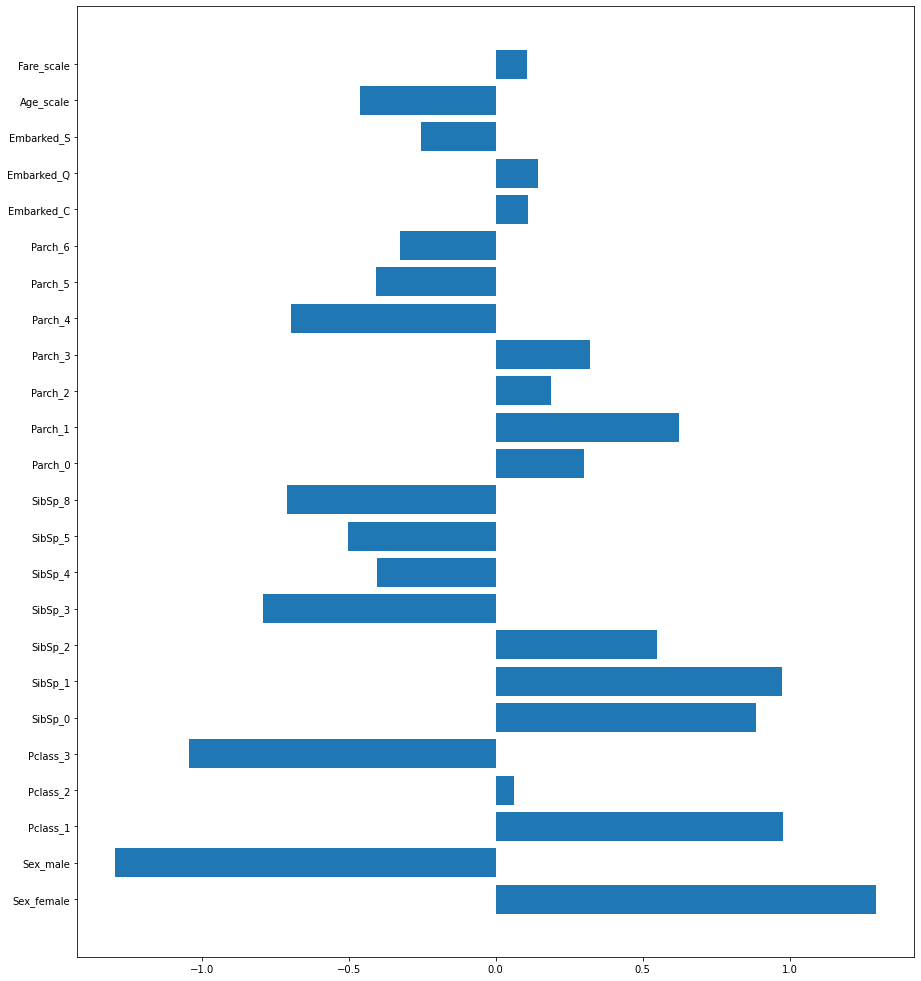

In [137]:
#各係数の可視化
fig = plt.figure(figsize= (15,500))

for i in range(len(model.coef_)):
          ax = fig.add_subplot(24,1,i+1)
          names = ['Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3','SibSp_0','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8','Parch_0','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6','Embarked_C','Embarked_Q','Embarked_S','Age_scale','Fare_scale']
          ax.barh(y=names,width=result.coef_[i])

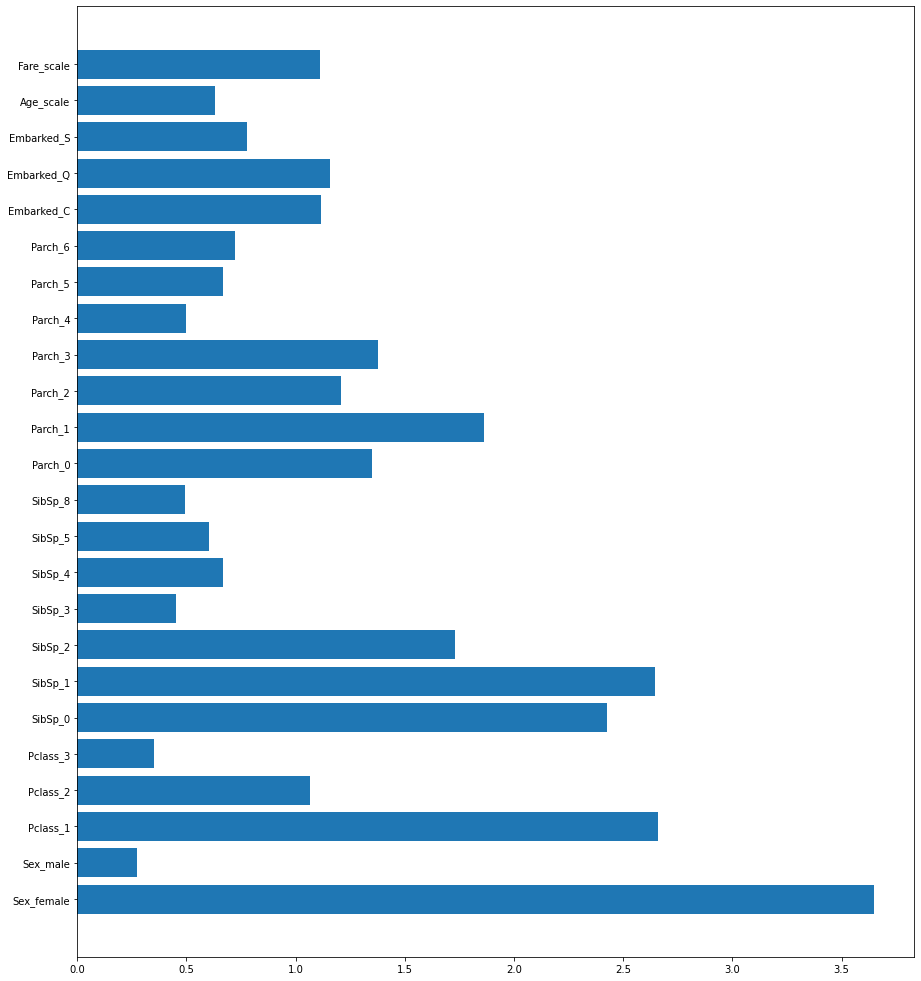

In [143]:
#オッズ比の可視化
fig = plt.figure(figsize= (15,500))

for i in range(len(model.coef_)):
          ax = fig.add_subplot(24,1,i+1)
          names = ['Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3','SibSp_0','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8','Parch_0','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6','Embarked_C','Embarked_Q','Embarked_S','Age_scale','Fare_scale']
          ax.barh(y=names,width=np.exp(model.coef_)[i])

In [138]:
#テストデータの説明関数
x_test = test_data_dummies[['Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3','SibSp_0','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8','Parch_0','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6','Embarked_C','Embarked_Q','Embarked_S','Age_scale','Fare_scale']]

In [139]:
y_predict = model.predict(x_test)

In [140]:
output_csv = pd.concat([test_data_dummies['PassengerId'], pd.Series(y_predict)], axis=1)

In [141]:
output_csv.columns = ['PassengerId', 'Survived']

In [142]:
output_csv.to_csv('./submition.csv', index=False)